In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

#시각화 패키지
import matplotlib.pyplot as plt

#시각화 할 때 한글을 출력할 수 있도록 하기 위해서
import platform
from matplotlib import font_manager, rc

#한글 처리
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#음수를 표시하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

## cartogram

### 데이터 가져오기

In [4]:
population = pd.read_excel('./data/population.xlsx', header=1)
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   행정구역별(시군구)(1)  18 non-null     object
 1   행정구역별(시군구)(2)  321 non-null    object
 2   성별(1)          963 non-null    object
 3   합계             963 non-null    int64 
 4   20~24세         963 non-null    int64 
 5   25~29세         963 non-null    int64 
 6   30~34세         963 non-null    int64 
 7   35~39세         963 non-null    int64 
 8   40~44세         963 non-null    int64 
 9   45~49세         963 non-null    int64 
 10  50~54세         963 non-null    int64 
 11  55~59세         963 non-null    int64 
 12  60~64세         963 non-null    int64 
 13  65~69세         963 non-null    int64 
 14  70~74세         963 non-null    int64 
 15  75~79세         963 non-null    int64 
 16  80~84세         963 non-null    int64 
 17  85세이상          963 non-null    int64 
dtypes: int64(15), object(3)
memory

### 필요한 데이터 추출

In [5]:
#결측치를 앞의 데이터로 채우기
population.fillna(method='ffill', inplace=True)

#컬럼이름 변경하기
population.rename(columns = {'행정구역별(시군구)(1)':'광역시도', 
                             '행정구역별(시군구)(2)':'시도', 
                             '합계':'인구수'}, inplace=True)
print(population.head())

#소계를 제외한 데이터만 가져오기
#population = population[(population['시도'] != '소계')]
#print(population.head())

    광역시도  시도 성별(1)       인구수   20~24세   25~29세   30~34세   35~39세   40~44세  \
0     전국  소계     계  48674177  2676127  3284719  3023482  3789676  3698794   
1     전국  소계    남자  24029501  1266355  1713307  1549970  1924470  1869529   
2     전국  소계    여자  24644676  1409772  1571412  1473512  1865206  1829265   
3  서울특별시  소계     계   9096901   548245   768413   687804   746830   677660   
4  서울특별시  소계    남자   4386287   233761   377349   341858   374514   335606   

    45~49세   50~54세   55~59세   60~64세   65~69세   70~74세   75~79세   80~84세  \
0  4289786  4169392  4140190  3578478  2430488  1888139  1544916  1001174   
1  2162206  2078150  2059480  1754466  1166572   878584   659165   379422   
2  2127580  2091242  2080710  1824012  1263916  1009555   885751   621752   
3   782455   731258   728273   664875   465250   370242   280007   163363   
4   385491   354886   349208   313417   218378   170303   126711    66754   

    85세이상  
0  600048  
1  178713  
2  421335  
3   96792  
4   30757  


In [6]:
population.is_copy = False
population.rename(columns = {'성별(1)':'구분'}, inplace=True)
population.loc[population['구분'] == '계', '구분'] = '합계'
print(population.head())


    광역시도  시도  구분       인구수   20~24세   25~29세   30~34세   35~39세   40~44세  \
0     전국  소계  합계  48674177  2676127  3284719  3023482  3789676  3698794   
1     전국  소계  남자  24029501  1266355  1713307  1549970  1924470  1869529   
2     전국  소계  여자  24644676  1409772  1571412  1473512  1865206  1829265   
3  서울특별시  소계  합계   9096901   548245   768413   687804   746830   677660   
4  서울특별시  소계  남자   4386287   233761   377349   341858   374514   335606   

    45~49세   50~54세   55~59세   60~64세   65~69세   70~74세   75~79세   80~84세  \
0  4289786  4169392  4140190  3578478  2430488  1888139  1544916  1001174   
1  2162206  2078150  2059480  1754466  1166572   878584   659165   379422   
2  2127580  2091242  2080710  1824012  1263916  1009555   885751   621752   
3   782455   731258   728273   664875   465250   370242   280007   163363   
4   385491   354886   349208   313417   218378   170303   126711    66754   

    85세이상  
0  600048  
1  178713  
2  421335  
3   96792  
4   30757  


### 연산을 수행해서 새로운 컬럼 생성

In [7]:
population['20-39세'] = population['20~24세'] + population['25~29세'] + \
                        population['30~34세'] + population['35~39세']
    
population['65세이상'] = population['65~69세'] + population['70~74세'] + \
                        population['75~79세'] + population['80~84세'] + \
                        population['85세이상']

print(population.head(5))


    광역시도  시도  구분       인구수   20~24세   25~29세   30~34세   35~39세   40~44세  \
0     전국  소계  합계  48674177  2676127  3284719  3023482  3789676  3698794   
1     전국  소계  남자  24029501  1266355  1713307  1549970  1924470  1869529   
2     전국  소계  여자  24644676  1409772  1571412  1473512  1865206  1829265   
3  서울특별시  소계  합계   9096901   548245   768413   687804   746830   677660   
4  서울특별시  소계  남자   4386287   233761   377349   341858   374514   335606   

    45~49세   50~54세   55~59세   60~64세   65~69세   70~74세   75~79세   80~84세  \
0  4289786  4169392  4140190  3578478  2430488  1888139  1544916  1001174   
1  2162206  2078150  2059480  1754466  1166572   878584   659165   379422   
2  2127580  2091242  2080710  1824012  1263916  1009555   885751   621752   
3   782455   731258   728273   664875   465250   370242   280007   163363   
4   385491   354886   349208   313417   218378   170303   126711    66754   

    85세이상    20-39세    65세이상  
0  600048  12774004  7464765  
1  178713   6454102  326

### 피벗 테이블 생성

In [8]:
pop = pd.pivot_table(population, 
                     index = ['광역시도', '시도'], 
                     columns = ['구분'],
                     values = ['인구수', '20-39세', '65세이상'])
print(pop.head())


          20-39세                 65세이상                    인구수                
구분            남자     여자      합계     남자     여자      합계      남자      여자      합계
광역시도 시도                                                                      
강원도  강릉시   25015  20993   46008  17378  23119   40497  101154  101903  203057
     고성군    2307   1699    4006   2957   4048    7005   11933   11688   23621
     동부   107274  99757  207031  60579  80917  141496  429208  440900  870108
     동해시    8801   7510   16311   7075   9077   16152   42093   41795   83888
     면부    32694  25881   58575  39083  48340   87423  164042  157263  321305


### 새로운 컬럼 추가

In [9]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
print(pop.head())


          20-39세                 65세이상                    인구수                  \
구분            남자     여자      합계     남자     여자      합계      남자      여자      합계   
광역시도 시도                                                                         
강원도  강릉시   25015  20993   46008  17378  23119   40497  101154  101903  203057   
     고성군    2307   1699    4006   2957   4048    7005   11933   11688   23621   
     동부   107274  99757  207031  60579  80917  141496  429208  440900  870108   
     동해시    8801   7510   16311   7075   9077   16152   42093   41795   83888   
     면부    32694  25881   58575  39083  48340   87423  164042  157263  321305   

              소멸비율  
구분                  
광역시도 시도             
강원도  강릉시  1.036768  
     고성군  0.485082  
     동부   1.410033  
     동해시  0.929916  
     면부   0.592087  


In [10]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
print(pop.head())


          20-39세                 65세이상                    인구수                  \
구분            남자     여자      합계     남자     여자      합계      남자      여자      합계   
광역시도 시도                                                                         
강원도  강릉시   25015  20993   46008  17378  23119   40497  101154  101903  203057   
     고성군    2307   1699    4006   2957   4048    7005   11933   11688   23621   
     동부   107274  99757  207031  60579  80917  141496  429208  440900  870108   
     동해시    8801   7510   16311   7075   9077   16152   42093   41795   83888   
     면부    32694  25881   58575  39083  48340   87423  164042  157263  321305   

              소멸비율 소멸위기지역  
구분                         
광역시도 시도                    
강원도  강릉시  1.036768  False  
     고성군  0.485082   True  
     동부   1.410033  False  
     동해시  0.929916   True  
     면부   0.592087   True  


### 인구 소멸 지역의 인덱스 출력

In [11]:
print(pop[pop['소멸위기지역']==True].index.get_level_values(1))

Index(['고성군', '동해시', '면부', '삼척시', '양구군', '양양군', '영월군', '읍부', '인제군', '정선군',
       ...
       '청양군', '태안군', '홍성군', '괴산군', '단양군', '면부', '보은군', '영동군', '옥천군', '제천시'],
      dtype='object', name='시도', length=118)


### 인덱스 초기화 - 인덱스를 컬럼으로 변환

In [12]:
pop.reset_index(inplace=True) 
print(pop.head())

   광역시도   시도  20-39세                 65세이상                    인구수          \
구분                남자     여자      합계     남자     여자      합계      남자      여자   
0   강원도  강릉시   25015  20993   46008  17378  23119   40497  101154  101903   
1   강원도  고성군    2307   1699    4006   2957   4048    7005   11933   11688   
2   강원도   동부  107274  99757  207031  60579  80917  141496  429208  440900   
3   강원도  동해시    8801   7510   16311   7075   9077   16152   42093   41795   
4   강원도   면부   32694  25881   58575  39083  48340   87423  164042  157263   

                소멸비율 소멸위기지역  
구분      합계                   
0   203057  1.036768  False  
1    23621  0.485082   True  
2   870108  1.410033  False  
3    83888  0.929916   True  
4   321305  0.592087   True  


### 첫번째 와 두번째 컬럼을 합치기

In [14]:
tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
                pop.columns.get_level_values(1)[n] 
                for n in range(0,len(pop.columns.get_level_values(0)))]

pop.columns = tmp_coloumns
print(pop.head())





IndexError: Too many levels: Index has only 1 level, not 2

In [15]:
pop.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      321 non-null    object 
 1   시도        321 non-null    object 
 2   20-39세남자  321 non-null    int64  
 3   20-39세여자  321 non-null    int64  
 4   20-39세합계  321 non-null    int64  
 5   65세이상남자   321 non-null    int64  
 6   65세이상여자   321 non-null    int64  
 7   65세이상합계   321 non-null    int64  
 8   인구수남자     321 non-null    int64  
 9   인구수여자     321 non-null    int64  
 10  인구수합계     321 non-null    int64  
 11  소멸비율      321 non-null    float64
 12  소멸위기지역    321 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 30.5+ KB


### 시도 이름 확인

In [16]:
print(pop['시도'].unique())


['강릉시' '고성군' '동부' '동해시' '면부' '삼척시' '소계' '속초시' '양구군' '양양군' '영월군' '원주시' '읍부'
 '인제군' '정선군' '철원군' '춘천시' '태백시' '평창군' '홍천군' '화천군' '횡성군' '가평군' '고양시' '과천시'
 '광명시' '광주시' '구리시' '군포시' '권선구' '기흥구' '김포시' '남양주시' '단원구' '덕양구' '동두천시' '동안구'
 '만안구' '부천시' '분당구' '상록구' '성남시' '수원시' '수정구' '수지구' '시흥시' '안산시' '안성시' '안양시'
 '양주시' '양평군' '여주시' '연천군' '영통구' '오산시' '용인시' '의왕시' '의정부시' '이천시' '일산동구'
 '일산서구' '장안구' '중원구' '처인구' '파주시' '팔달구' '평택시' '포천시' '하남시' '화성시' '거제시' '거창군'
 '김해시' '남해군' '마산합포구' '마산회원구' '밀양시' '사천시' '산청군' '성산구' '양산시' '의령군' '의창구'
 '진주시' '진해구' '창녕군' '창원시' '통영시' '하동군' '함안군' '함양군' '합천군' '경산시' '경주시' '고령군'
 '구미시' '군위군' '김천시' '남구' '문경시' '봉화군' '북구' '상주시' '성주군' '안동시' '영덕군' '영양군'
 '영주시' '영천시' '예천군' '울릉군' '울진군' '의성군' '청도군' '청송군' '칠곡군' '포항시' '광산구' '동구'
 '서구' '달서구' '달성군' '수성구' '중구' '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구' '부산진구'
 '사상구' '사하구' '수영구' '연제구' '영도구' '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구' '구로구'
 '금천구' '노원구' '도봉구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구'
 '영등포구' '용산구' '은평구' '종로구' '중랑구' '세종시' '울주군' '강화군' '계양

### 시도이름 편집

In [17]:
si_name = [None] * len(pop)

#광역시가 아닌 곳 중에서 구를 가지고 있는 시도들의 구이름 디셔너리 생성
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

for n in pop.index:
    #고성이 2곳이므로 도를 추가
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        #그 이외의 지역은 마지막 한글자를 제거해서 군 이나 시 글자를 제거
        else:
             si_name[n] = pop['시도'][n][:-1]
        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]
    #세종은 이름을 수정    
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]
print(si_name)


['강릉', '고성(강원)', '동', '동해', '면', '삼척', '소', '속초', '양구', '양양', '영월', '원주', '읍', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천', '광명', '광주', '구리', '군포', '수원 권선', '용인 기흥', '김포', '남양주', '안산 단원', '고양 덕양', '동두천', '동', '안양 동안', '안양 만안', '면', '부천', '성남 분당', '안산 상록', '성남', '소', '수원', '성남 수정', '용인 수지', '시흥', '안산', '안성', '안양', '양주', '양평', '여주', '연천', '수원 영통', '오산', '용인', '읍', '의왕', '의정부', '이천', '고양 일산동', '고양 일산서', '수원 장안', '성남 중원', '용인 처인', '파주', '수원 팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '동', '창원 합포', '창원 회원', '면', '밀양', '사천', '산청', '창원 성산', '소', '양산', '읍', '의령', '창원 의창', '진주', '창원 진해', '창녕', '창원', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '포항 남구', '동', '면', '문경', '봉화', '포항 북구', '상주', '성주', '소', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '읍', '의성', '청도', '청송', '칠곡', '포항', '광주 광산', '광주 남구', '광주 동구', '광주 북구', '광주 서구', '광주 소계', '대구 남구', '대구 달서', '대구 달성', '대구 동구', '대구 동부', '대구 면부', '대구 북구', '대구 서구', '대구 소계', '대구 수성', '대구 읍부

### 새로만든 시도 이름을 추가하고 불필요한 컬럼 제거

In [18]:
pop['ID'] = si_name

del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

print(pop.head())


  광역시도   시도  20-39세여자  20-39세합계  65세이상합계   인구수남자   인구수여자   인구수합계      소멸비율  \
0  강원도  강릉시     20993     46008    40497  101154  101903  203057  1.036768   
1  강원도  고성군      1699      4006     7005   11933   11688   23621  0.485082   
2  강원도   동부     99757    207031   141496  429208  440900  870108  1.410033   
3  강원도  동해시      7510     16311    16152   42093   41795   83888  0.929916   
4  강원도   면부     25881     58575    87423  164042  157263  321305  0.592087   

   소멸위기지역      ID  
0   False      강릉  
1    True  고성(강원)  
2   False       동  
3    True      동해  
4    True       면  


### 카토그램을 위한 엑셀 파일 읽기

In [21]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw.xlsx')
print(draw_korea_raw)

       0      1      2       3       4       5      6       7      8      9   \
0     NaN    NaN    NaN     NaN     NaN     NaN    NaN      철원     화천     양구   
1     NaN    NaN    NaN      양주     동두천      연천     포천     의정부     인제     춘천   
2     NaN    NaN    NaN   고양 덕양  고양 일산동   서울 도봉  서울 노원     남양주     홍천     횡성   
3     NaN    NaN     파주  고양 일산서      김포   서울 강북  서울 성북      가평     구리     하남   
4     NaN    NaN  부천 소사   안양 만안      광명  서울 서대문  서울 종로  서울 동대문  서울 중랑     양평   
5     NaN  인천 강화  부천 원미   안양 동안   서울 은평   서울 마포  서울 중구   서울 성동  서울 강동     여주   
6     NaN  인천 서구  부천 오정      시흥   서울 강서   서울 동작  서울 용산   서울 광진  서울 송파     이천   
7     NaN  인천 동구  인천 계양   안산 상록   서울 양천   서울 관악  서울 서초   성남 중원     과천     광주   
8     NaN    NaN  인천 부평   안산 단원  서울 영등포   서울 금천  서울 강남   성남 분당  성남 수정  용인 수지   
9     NaN  인천 중구  인천 남구      화성   서울 구로      군포     의왕   수원 영통  용인 기흥  용인 처인   
10  인천 옹진  인천 연수  인천 남동      오산      안성   수원 권선  수원 장안      제천     예천     영주   
11     태안     아산  천안 동남   천안 서북      평택 

### 컬럼 이름을 인덱스로 추가 - stack

In [22]:
#컬럼 이름을 인덱스로 만들기
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
print(draw_korea_raw_stacked)

            0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]


### 인덱스 초기화

In [23]:
draw_korea_raw_stacked.reset_index(inplace=True)
print(draw_korea_raw_stacked)


     level_0  level_1       0
0          0        7      철원
1          0        8      화천
2          0        9      양구
3          0       10  고성(강원)
4          1        3      양주
..       ...      ...     ...
247       24        2      장흥
248       24        3      보성
249       25        2      완도
250       25        5      제주
251       26        5     서귀포

[252 rows x 3 columns]


### 컬럼 이름 변경

In [24]:
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)
print(draw_korea_raw_stacked) 


      y   x      ID
0     0   7      철원
1     0   8      화천
2     0   9      양구
3     0  10  고성(강원)
4     1   3      양주
..   ..  ..     ...
247  24   2      장흥
248  24   3      보성
249  25   2      완도
250  25   5      제주
251  26   5     서귀포

[252 rows x 3 columns]


### 경계선 그리기

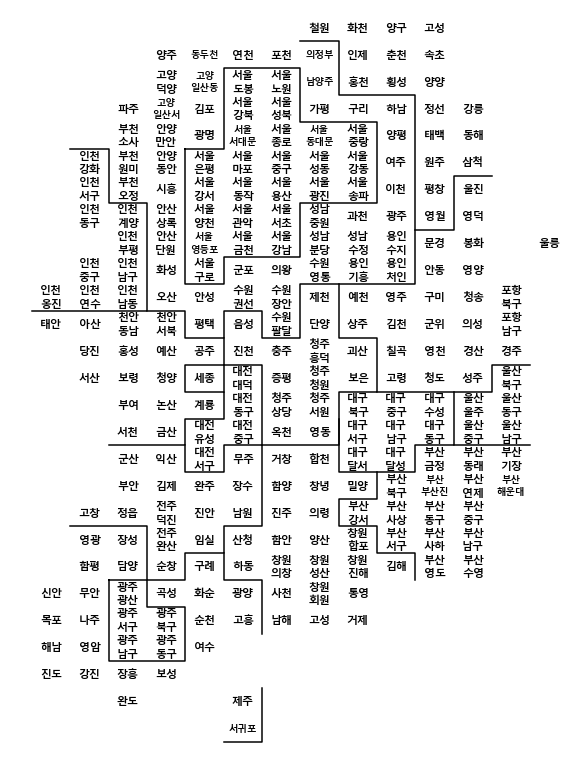

In [25]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea_raw_stacked.iterrows():
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']
# 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

#y축의 위아래 변경
plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

#축과 라벨 제거
plt.axis('off')

#자동 레이아웃 설정
plt.tight_layout()
plt.show()


### 2개의 데이터에서 도시 이름 일치시키기

In [26]:
#draw_korea_raw_stacked 와 pop 의 도시이름 비교
print(set(draw_korea_raw_stacked['ID'].unique()) - set(pop['ID'].unique()))
print(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))

#일치하지 않는 데이터 삭제
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))


{'부천 오정', '부천 원미', '인천 남구', '부천 소사'}
{'부산 소계', '고양', '부천', '부산 동부', '대구 소계', '서울 소계', '용인', '울산 동부', '대전 소계', '면', '대구 읍부', '창원', '울산 소계', '성남', '전주', '인천 미추홀', '청주', '수원', '인천 동부', '동', '부산 면부', '인천 면부', '안산', '소', '인천 읍부', '대구 동부', '읍', '울산 읍부', '인천 소계', '포항', '대구 면부', '울산 면부', '천안', '부산 읍부', '안양', '광주 소계'}
set()


### 2개의 데이터 합치기

In [27]:
pop = pd.merge(pop, draw_korea_raw_stacked, how='left', on=['ID'])
print(pop.head())


  광역시도   시도  20-39세여자  20-39세합계  65세이상합계   인구수남자   인구수여자   인구수합계      소멸비율  \
0  강원도  강릉시     20993     46008    40497  101154  101903  203057  1.036768   
1  강원도  고성군      1699      4006     7005   11933   11688   23621  0.485082   
2  강원도  동해시      7510     16311    16152   42093   41795   83888  0.929916   
3  강원도  삼척시      5280     12428    14953   31630   30203   61833  0.706213   
4  강원도  속초시      7411     15928    14010   37488   38814   76302  1.057959   

   소멸위기지역      ID  y   x  
0   False      강릉  3  11  
1    True  고성(강원)  0  10  
2    True      동해  4  11  
3    True      삼척  5  11  
4   False      속초  1  10  


### 피벗 테이블 만들기

In [28]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
print(mapdata)


x         0         1         2         3         4         5         6   \
y                                                                          
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN  207734.0   87789.0   39677.0  135779.0   
2        NaN       NaN       NaN  434496.0  274192.0  315032.0  504967.0   
3        NaN       NaN  420588.0  280312.0  410416.0  294143.0  418403.0   
4        NaN       NaN       NaN  232970.0  300735.0  291958.0  136649.0   
5        NaN   60622.0       NaN  305176.0  447693.0  348755.0  115665.0   
6        NaN  515884.0       NaN  451166.0  559359.0  374478.0  204196.0   
7        NaN   60791.0  288422.0  329833.0  429819.0  472796.0  391520.0   
8        NaN       NaN  487471.0  292166.0  341509.0  219896.0  493492.0   
9        NaN  123549.0       NaN  768956.0  386239.0  261123.0  150673.0   
10   17746.0  345349.0  508503.0  215639.0  174023.0  356678.0  262957.0   
11   57081.0

### 존재하는 데이터 확인

In [30]:
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
print(masked_mapdata)

[[-- -- -- -- -- -- -- 40147.0 21700.0 19900.0 23621.0 -- -- --]
 [-- -- -- 207734.0 87789.0 39677.0 135779.0 425099.0 28219.0 265695.0
  76302.0 -- -- --]
 [-- -- -- 434496.0 274192.0 315032.0 504967.0 658410.0 62531.0 41427.0
  25125.0 -- -- --]
 [-- -- 420588.0 280312.0 410416.0 294143.0 418403.0 55249.0 187625.0
  254528.0 32728.0 203057.0 -- --]
 [-- -- -- 232970.0 300735.0 291958.0 136649.0 327897.0 374640.0 105056.0
  40467.0 83888.0 -- --]
 [-- 60622.0 -- 305176.0 447693.0 348755.0 115665.0 283330.0 403443.0
  102076.0 329874.0 61833.0 -- --]
 [-- 515884.0 -- 451166.0 559359.0 374478.0 204196.0 331747.0 629275.0
  200370.0 37624.0 44272.0 -- --]
 [-- 60791.0 288422.0 329833.0 429819.0 472796.0 391520.0 208514.0
  52389.0 350406.0 34342.0 33715.0 -- --]
 [-- -- 487471.0 292166.0 341509.0 219896.0 493492.0 450949.0 221396.0
  343400.0 64832.0 28857.0 -- 8200.0]
 [-- 123549.0 -- 768956.0 386239.0 261123.0 150673.0 349508.0 408613.0
  237751.0 148890.0 15272.0 -- --]
 [17746.0 3453

### 카토그램을 그려주는 사용자 정의 함수 생성

In [31]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    #인구수 데이터의 크고 낮음을 분류하기 위한 값 만들기
    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])
    #컬럼이름을 대입하기
    datalabel = targetData
    #최대값과 최소값 구하기
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    
    #x 와 y를 가지고 피봇 테이블 만들기
    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    #데이터가 존재하는 것 골라내기
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    #그래프 영역 크기 만들기
    plt.figure(figsize=(9, 11))
    #색상 설정
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.
            
        #글자색상 만들기
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        #텍스트 출력하기
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

        # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()


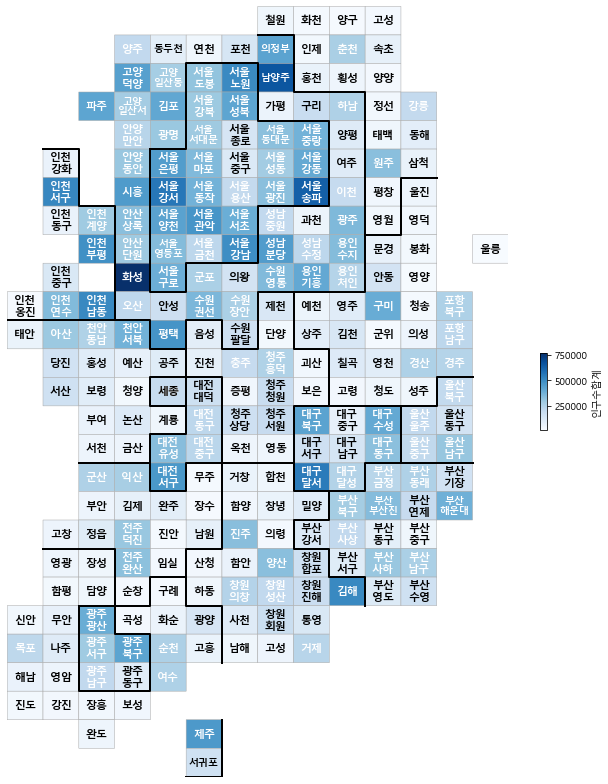

In [32]:
drawKorea('인구수합계', pop, 'Blues')

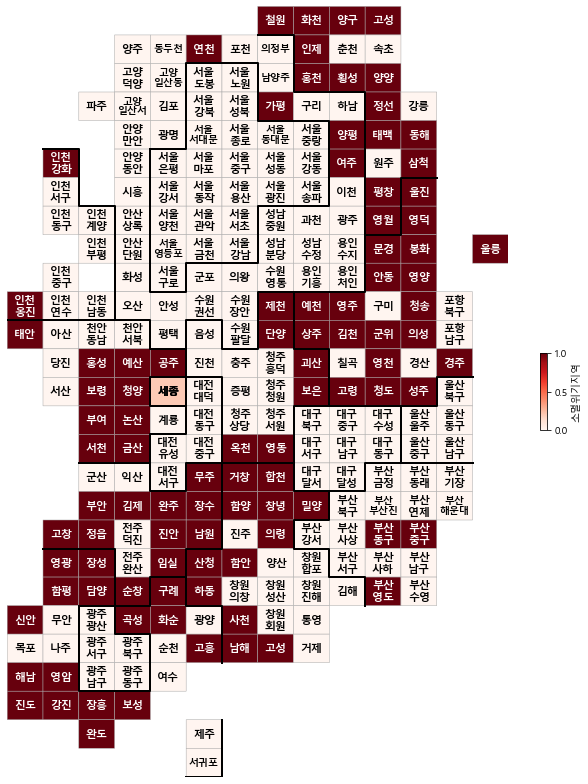

In [33]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')


# 데이터 전처리

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

#시각화 패키지
import matplotlib.pyplot as plt

#시각화 할 때 한글을 출력할 수 있도록 하기 위해서
import platform
from matplotlib import font_manager, rc

#한글 처리
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#음수를 표시하기 위한 설정
plt.rcParams['axes.unicode_minus'] = False

## 수치 데이터

### 단위 환산

In [37]:
#데이터 읽어오기
mpg = pd.read_csv('./data/auto-mpg.csv', header=None)

#컬럼 이름 만들기
mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin',
              'name']

mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [40]:
#mpg 가 갤런당 마일이라서 리터당 킬로미터로 변환해서 열을 추가
#1.60934 / 3.78541
#소수 두째 자리에서 반올림
mpg['kpl'] = (mpg['mpg'] * 1.60934 / 3.78541).round(2)

print(mpg.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name   kpl  
0       1  chevrolet chevelle malibu  7.65  
1       1          buick skylark 320  6.38  
2       1         plymouth satellite  7.65  
3       1              amc rebel sst  6.80  
4       1                ford torino  7.23  


### 자료형 확인

In [42]:
mpg.info()
print(mpg.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
 9   kpl           398 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
name             object
kpl             float64
dtype: object


### horsepower 열의 데이터를 실수로 변환

In [45]:
#horsepower의 값들을 확인
print(mpg['horsepower'].unique())

#?를 nan으로 변환
mpg['horsepower'].replace('?', np.nan, inplace=True)
mpg['horsepower'] = mpg['horsepower'].astype('float')
mpg.info()

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' nan '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   c

In [46]:
#정수 데이터를 매핑이 되는 문자열로 변환
mpg['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.80
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.23


In [48]:
# 범주형으로 변환
mpg['origin'] = mpg['origin'].astype('category')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 28.6+ KB


### 표준값 구하기


<AxesSubplot:xlabel='이름'>

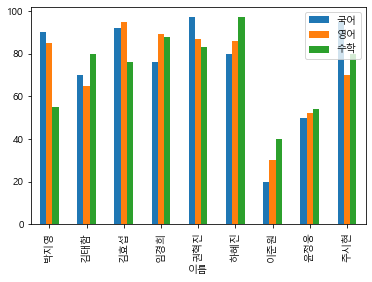

In [57]:
student = pd.read_csv('./data/student.csv', encoding='cp949')
student.index = student['이름']
#student.info()

#print(student.head())
student.plot(kind='bar')

<AxesSubplot:xlabel='이름'>

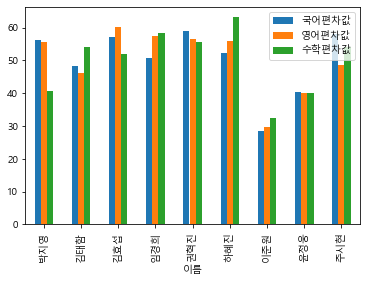

In [62]:
#표준값 구하기
kormean, korstd = student['국어'].mean(), student['국어'].std()
engmean, engstd = student['영어'].mean(), student['영어'].std()
matmean, matstd = student['수학'].mean(), student['수학'].std()

student['국어표준값'] = (student['국어'] - kormean)/korstd
student['영어표준값'] = (student['영어'] - engmean)/engstd
student['수학표준값'] = (student['수학'] - matmean)/matstd

#편차값 구하기
student['국어편차값'] = student['국어표준값'] * 10 + 50
student['영어편차값'] = student['영어표준값'] * 10 + 50
student['수학편차값'] = student['수학표준값'] * 10 + 50

student[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar')

In [65]:
#horsepower 의 값을 scaling - 최대값으로 나누기
mpg['scale_horsepower'] = mpg['horsepower'] / mpg['horsepower'].max()

mpg.head()

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year origin                       name   kpl  scale_horsepower  
0          70    USA  chevrolet chevelle malibu  7.65          0.565217  
1          70    USA          buick skylark 320  6.38          0.717391  
2          70    USA         plymouth satellite  7.65          0.652174  
3          70    USA              amc rebel sst  6.80          0.652174  
4          70    USA                ford torino  7.23          0.608696  


In [66]:
#horsepower 의 값을 scaling - 최대값-최소값으로 나누기
val = mpg['horsepower'].max() - mpg['horsepower'].min()
mpg['scale_horsepower'] = mpg['horsepower'] / val

mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,scale_horsepower
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu,7.65,0.706522
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.38,0.896739
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.65,0.815217
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.80,0.815217
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.23,0.760870


In [71]:
#scikit-learn 을 이용한 스케일링
from sklearn import preprocessing

#스케일링 객체 생성
scaler = preprocessing.MinMaxScaler()
scaler.fit(mpg[['horsepower']].values)
scaler.transform(mpg[['horsepower']].values)

array([[0.45652174],
       [0.64673913],
       [0.56521739],
       [0.56521739],
       [0.51086957],
       [0.82608696],
       [0.94565217],
       [0.91847826],
       [0.97282609],
       [0.7826087 ],
       [0.67391304],
       [0.61956522],
       [0.56521739],
       [0.97282609],
       [0.26630435],
       [0.26630435],
       [0.27717391],
       [0.21195652],
       [0.22826087],
       [0.        ],
       [0.22282609],
       [0.23913043],
       [0.26630435],
       [0.36413043],
       [0.23913043],
       [0.91847826],
       [0.83695652],
       [0.89130435],
       [0.79891304],
       [0.22826087],
       [0.23913043],
       [0.26630435],
       [       nan],
       [0.29347826],
       [0.32065217],
       [0.29347826],
       [0.22826087],
       [0.29347826],
       [0.64673913],
       [0.70108696],
       [0.58152174],
       [0.56521739],
       [0.72826087],
       [0.67391304],
       [0.70108696],
       [0.34782609],
       [0.14130435],
       [0.293

### 서울시 구별 범죄 현황 데이터를 이용한 시각화

In [98]:
#구분자가 탭, 첫번째 줄의 데이터는 필요없으므로 건너띄기
criminal = pd.read_csv('./data/crime.txt', 
                       sep='\t', thousands=',',
                      encoding='utf-8')
#criminal.head()

#첫번째 행 제거
criminal.drop(0, inplace=True)
criminal.head()

,기간,자치구,합계발생,합계검거,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
1,2016,종로구,4459,4298,6,5,12,14,238,1106,1940,1020,2263,2153
2,2016,중구,4584,3068,3,3,8,7,198,148,2150,914,2225,1996
3,2016,용산구,4137,2835,4,4,9,10,251,214,1489,599,2384,2008
4,2016,성동구,3026,2392,4,5,3,5,104,78,1296,896,1619,1408
5,2016,광진구,5322,3312,4,4,11,6,279,234,2636,1057,2392,2011


In [99]:
#불필요한 컬럼을 삭제하고 컬럼 이름을 수정
#기간, 합계검거, 살인검거, 강도검거, 강간검거, 절도검거, 폭력검거 삭제
criminal.drop(['기간', '합계검거', '살인검거', 
              '강도검거', '강간검거', '절도검거', '폭력검거'],
              axis = 1, inplace=True)

#컬럼 이름 변경
criminal.rename(columns={'살인발생':'살인', '강도발생':'강도',
                        '강간발생':'강간', '절도발생':'절도',
                        '폭력발생':'폭력'}, inplace=True)\

criminal.head(5)

,자치구,합계발생,살인,강도,강간,절도,폭력
1,종로구,4459,6,12,238,1940,2263
2,중구,4584,3,8,198,2150,2225
3,용산구,4137,4,9,251,1489,2384
4,성동구,3026,4,3,104,1296,1619
5,광진구,5322,4,11,279,2636,2392


In [100]:
#서울시 구별 인구를 읽어옵니다 - pop.txt
pop = pd.read_csv('./data/pop.txt', 
                       sep='\t', thousands=',', skiprows=2,
                      encoding='utf-8')
pop = pop[['자치구', '계']]
pop.head()

,자치구,계
0,합계,9795426
1,종로구,155106
2,중구,132259
3,용산구,240665
4,성동구,295767


In [101]:
# criminal 과 pop 을 조인
df = pd.merge(criminal, pop)
df.head()

,자치구,합계발생,살인,강도,강간,절도,폭력,계
0,종로구,4459,6,12,238,1940,2263,155106
1,중구,4584,3,8,198,2150,2225,132259
2,용산구,4137,4,9,251,1489,2384,240665
3,성동구,3026,4,3,104,1296,1619,295767
4,광진구,5322,4,11,279,2636,2392,355306


In [102]:
#인구대비 각 범죄 발생 비율을 생성
df['살인발생율'] = df['살인']/df['계']
df['강도발생율'] = df['강도']/df['계']
df['강간발생율'] = df['강간']/df['계']
df['절도발생율'] = df['절도']/df['계']
df['폭력발생율'] = df['폭력']/df['계']

df.head()

,자치구,합계발생,살인,강도,강간,절도,폭력,계,살인발생율,강도발생율,강간발생율,절도발생율,폭력발생율
0,종로구,4459,6,12,238,1940,2263,155106,0.000039,0.000077,0.001534,0.012508,0.014590
1,중구,4584,3,8,198,2150,2225,132259,0.000023,0.000060,0.001497,0.016256,0.016823
2,용산구,4137,4,9,251,1489,2384,240665,0.000017,0.000037,0.001043,0.006187,0.009906
3,성동구,3026,4,3,104,1296,1619,295767,0.000014,0.000010,0.000352,0.004382,0.005474
4,광진구,5322,4,11,279,2636,2392,355306,0.000011,0.000031,0.000785,0.007419,0.006732


In [103]:
#cctv.xlsx 파일의 내용 읽기
cctv = pd.read_excel('./data/cctv.xlsx')
#필요한 열만 선택
cctv = cctv[['기관명', '소계']]

#기관명의 공백을 제거
gu = []
for x in cctv['기관명']:
    gu.append(x.replace(' ', ''))
    
cctv['기관명'] = gu

cctv.head()

,기관명,소계
0,강남구,5221
1,강동구,1879
2,강북구,1265
3,강서구,1617
4,관악구,3985


In [96]:
# cctv 와 df 의 join - df 의 자치구 와 cctv 의 기관명으로 조인
df = pd.merge(df, cctv, left_on='자치구', right_on='기관명')
df.head()

,자치구,합계발생,살인,강도,강간,절도,폭력,계,살인발생율,강도발생율,강간발생율,절도발생율,폭력발생율,기관명,소계
0,종로구,4459,6,12,238,1940,2263,155106,0.000039,0.000077,0.001534,0.012508,0.014590,종로구,1471
1,중구,4584,3,8,198,2150,2225,132259,0.000023,0.000060,0.001497,0.016256,0.016823,중구,1544
2,용산구,4137,4,9,251,1489,2384,240665,0.000017,0.000037,0.001043,0.006187,0.009906,용산구,2063
3,성동구,3026,4,3,104,1296,1619,295767,0.000014,0.000010,0.000352,0.004382,0.005474,성동구,2679
4,광진구,5322,4,11,279,2636,2392,355306,0.000011,0.000031,0.000785,0.007419,0.006732,광진구,1581


In [104]:
#인덱스 설정
df = pd.pivot_table(df, index='자치구', aggfunc=np.sum)
df.head()

,강간,강간발생율,강도,강도발생율,계,살인,살인발생율,절도,절도발생율,폭력,폭력발생율,합계발생
자치구,,,,,,,,,,,,
강남구,516,0.000962,39,0.000073,536107,5,0.000009,3587,0.006691,4002,0.007465,8149
강동구,160,0.000341,14,0.000030,469094,4,0.000009,1754,0.003739,2530,0.005393,4462
강북구,217,0.000709,5,0.000016,306093,7,0.000023,1222,0.003992,2778,0.009076,4229
강서구,275,0.000472,10,0.000017,582995,9,0.000015,1952,0.003348,3204,0.005496,5450
관악구,322,0.000641,12,0.000024,502698,6,0.000012,2103,0.004183,3235,0.006435,5678


In [109]:
#강간발생율, 강도발생율, 살인발생율, 절도발생율, 폭력발생율
#을 MinMaxScaling
from sklearn import preprocessing

col = ['강간발생율', '강도발생율', 
       '살인발생율', '절도발생율', '폭력발생율']
#numpy 의 배열로 추출
x = df[col].values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

#표준화 한 데이터를 가지고 DataFrame 생성
criminal_norm = pd.DataFrame(x_scaled, columns=col, 
                            index = df.index)
criminal_norm

,강간발생율,강도발생율,살인발생율,절도발생율,폭력발생율
자치구,,,,,
강남구,0.541005,0.931277,0.026509,0.295127,0.259736
강동구,0.042309,0.293078,0.000000,0.077610,0.095868
강북구,0.337518,0.092108,0.475584,0.096264,0.387152
강서구,0.147134,0.104275,0.229156,0.048805,0.103967
관악구,0.282633,0.204216,0.113029,0.110352,0.178287
광진구,0.398754,0.309656,0.090556,0.348784,0.201777
구로구,0.284592,0.199476,0.420155,0.133573,0.258716
금천구,0.342550,0.274683,0.530381,0.182747,0.378203
노원구,0.013966,0.020755,0.036086,0.065230,0.051969


In [111]:
#df 의 강간, 강도, 살인, 절도, 폭력, 계, 소계를 추가
col = ['강간', '강도', '살인', '절도', '폭력' , '계', '합계발생']

criminal_norm[col] = df[col]

criminal_norm.head()

,강간발생율,강도발생율,살인발생율,절도발생율,폭력발생율,강간,강도,살인,절도,폭력,계,합계발생
자치구,,,,,,,,,,,,
강남구,0.541005,0.931277,0.026509,0.295127,0.259736,516,39,5,3587,4002,536107,8149
강동구,0.042309,0.293078,0.000000,0.077610,0.095868,160,14,4,1754,2530,469094,4462
강북구,0.337518,0.092108,0.475584,0.096264,0.387152,217,5,7,1222,2778,306093,4229
강서구,0.147134,0.104275,0.229156,0.048805,0.103967,275,10,9,1952,3204,582995,5450
관악구,0.282633,0.204216,0.113029,0.110352,0.178287,322,12,6,2103,3235,502698,5678


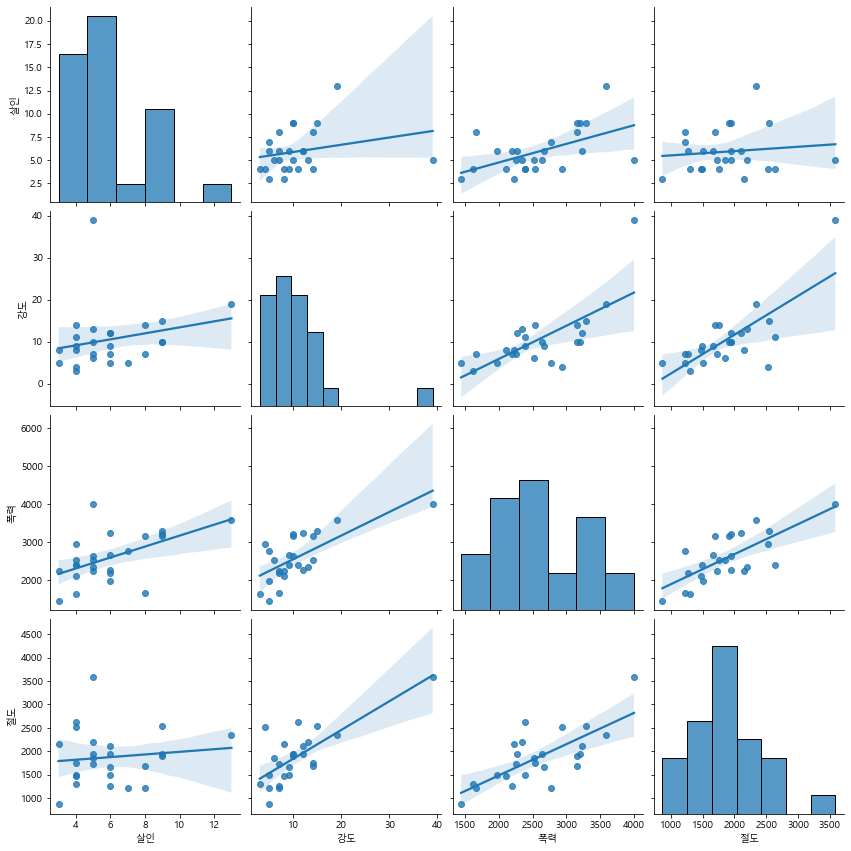

In [112]:
#상관 관계 시각화
sns.pairplot(criminal_norm, 
             vars=['살인', '강도', '폭력', '절도'],
            kind='reg', height=3)
plt.show()

<AxesSubplot:ylabel='자치구'>

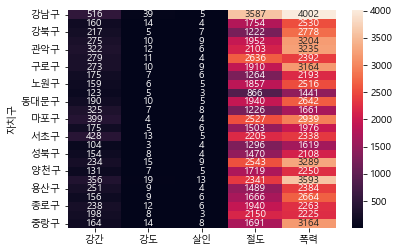

In [114]:
#표준화하지 않은 데이터를 가지고 heatmap 생성
#강간, 강도, 살인, 절도, 폭력
#데이터가 정규화되 않아고 강도 와 살인의 크기는 거의 없음
sns.heatmap(
    criminal_norm[['강간', '강도', '살인','절도', '폭력']],
           annot=True, fmt='d')

<AxesSubplot:ylabel='자치구'>

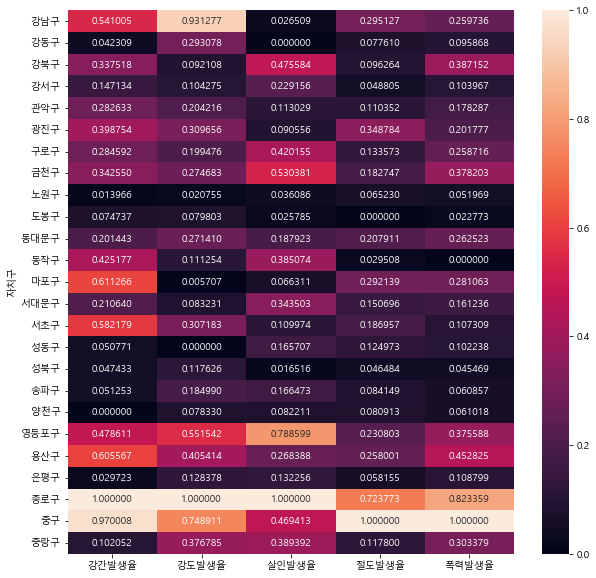

In [117]:
#표준화 수행한 데이터를 가지고 heatmap 생성
#강간발생율, 강도발생율, 살인발생율, 절도발생율, 폭력발생률
plt.figure(figsize=(10,10))
sns.heatmap(
    criminal_norm[['강간발생율', '강도발생율', '살인발생율',
                   '절도발생율', '폭력발생율']],
           annot=True, fmt='f')

### 정규화 - 행 단위로 스케일링

In [121]:
features = np.array([[1,2], [2,3], [3,8], [4,2], [7,2]])


#변환기 객체를 생성 - 맨하튼 거리로 계산
normalizer = preprocessing.Normalizer(norm='l1')
print(normalizer.transform(features))
print()

normalizer = preprocessing.Normalizer(norm='max')
print(normalizer.transform(features))

#이렇게 정규화를 해서 거리를 계산해서 유사도 판단할 때 사용합니다.
#자연어 처리에서 많이 사용

[[0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.27272727 0.72727273]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]]

[[0.5        1.        ]
 [0.66666667 1.        ]
 [0.375      1.        ]
 [1.         0.5       ]
 [1.         0.28571429]]


### 교차항 과 다항특성

In [128]:
features = np.array([[1,2], [2,3], [3,8], [4,2], [7,2]])

#교차항 과 다항 특성을 만들어 줄 객체를 생성
#degree 는 제곱하는 개수
#include_bias 는 맨 첫번째 항에 1을 추가할 지 여부
polynomial_interaction = preprocessing.PolynomialFeatures(
    degree=2, include_bias=True)

polynomial_interaction.fit_transform(features)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  8.,  9., 24., 64.],
       [ 1.,  4.,  2., 16.,  8.,  4.],
       [ 1.,  7.,  2., 49., 14.,  4.]])

### 특성 변환 - 기존 컬럼을 가지고 연산을 수행해서 새로운 컬럼을 만드는 것

In [145]:
#파이썬 기본 문법 이용
data = [100, 200, 300]

#전부 100을 더해주는 작업
result = []
for i in data:
    result.append(i + 100)
print(result)

#함수형 프로그래밍의 map 함수 이용
def add_hund(x):
    return x+100
result = map(add_hund, data)
for i in result:
    print(i, end='\t')
print()

#함수의 내용이 한 줄 이라서 lambda 이용 가능
result = map(lambda x : x+100, data)
for i in result:
    print(i, end='\t')
print()

#pandas 의 apply 함수를 이용한 함수 매핑
titanic = sns.load_dataset('titanic')
print(titanic['age'].apply(add_hund))

#sklearn 의 FunctionTransformer 이용
one_transformer = preprocessing.FunctionTransformer(add_hund)
print(one_transformer.transform(titanic['age']))

# 2개의 컬럼에 다른 함수를 적용 - ColumnTransformer
#age 열에는 add_hund 라는 함수를 적용하고
#parch에는 람다 함수를 적용
from sklearn import compose
column_transformer = compose.ColumnTransformer(
    [('add_hund', preprocessing.FunctionTransformer(add_hund),
     ['age']), 
     ('two_hund', preprocessing.FunctionTransformer(
     lambda x : x + 1), ['parch'])])
column_transformer.fit_transform(titanic)    

[200, 300, 400]
200	300	400	
200	300	400	
0      122.0
1      138.0
2      126.0
3      135.0
4      135.0
       ...  
886    127.0
887    119.0
888      NaN
889    126.0
890    132.0
Name: age, Length: 891, dtype: float64
0      122.0
1      138.0
2      126.0
3      135.0
4      135.0
       ...  
886    127.0
887    119.0
888      NaN
889    126.0
890    132.0
Name: age, Length: 891, dtype: float64


array([[122.,   1.],
       [138.,   1.],
       [126.,   1.],
       ...,
       [ nan,   3.],
       [126.,   1.],
       [132.,   1.]])

### 이산화 - 구간 분할

In [153]:
#데이터 읽어오기
mpg = pd.read_csv('./data/auto-mpg.csv', header=None)

#컬럼 이름 만들기
mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin',
              'name']


#horsepower를 숫자 자료형으로 변경
mpg['horsepower'] = mpg['horsepower'].replace('?', '0')
mpg['horsepower'] = mpg['horsepower'].astype('float')

#3개로 분할하기 위한 경계값 만들기
count, bin_dividers = np.histogram(mpg['horsepower'], bins=3)
print(bin_dividers)

#각 분할에 할당할 값을 생성
bin_names=['저출력', '보통출력', '고출력']

mpg['hp_bin'] = pd.cut(x=mpg['horsepower'],
                      labels=bin_names,
                      bins=bin_dividers,
                      include_lowest=True)
print(mpg[['horsepower', 'hp_bin']])

[  0.          76.66666667 153.33333333 230.        ]
     horsepower hp_bin
0         130.0   보통출력
1         165.0    고출력
2         150.0   보통출력
3         150.0   보통출력
4         140.0   보통출력
..          ...    ...
393        86.0   보통출력
394        52.0    저출력
395        84.0   보통출력
396        79.0   보통출력
397        82.0   보통출력

[398 rows x 2 columns]


In [155]:
#numpy 의 digitize 를 이용한 구간 분할
age = np.array([[13], [21], [22], [31], [45], [28]])
#30을 기준으로 2개로 분할
result = np.digitize(age, bins=[30])
print(result)

#3개 구간으로 나누기
result = np.digitize(age, bins=[20, 30])
print(result)

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]]
[[0]
 [1]
 [1]
 [2]
 [2]
 [1]]


In [156]:
#scikit-learn 을 이용해서 구간 분할

#2개의 구간으로 분할
binarizer = preprocessing.Binarizer(threshold=30)
print(binarizer.transform(age))

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [161]:
age = np.array([[13], [21], [22], [31], [45], [28], [29], [44]])

#이전의 numpy 의 digitize 와 유사한 결과
kb = preprocessing.KBinsDiscretizer(
    4, encode='ordinal', strategy='quantile')
print(kb.fit_transform(age))

#희소 행렬로 리턴
kb = preprocessing.KBinsDiscretizer(
    4, encode='onehot', strategy='quantile')
print(kb.fit_transform(age))

#밀집 행렬로 리턴 - 구간의 개수만큼 컬럼을 생성합니다.
kb = preprocessing.KBinsDiscretizer(
    4, encode='onehot-dense', strategy='uniform')
print(kb.fit_transform(age))

[[0.]
 [0.]
 [1.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]]
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 2)	1.0
  (4, 3)	1.0
  (5, 1)	1.0
  (6, 2)	1.0
  (7, 3)	1.0
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         36         24
4         64         37
5         24         46
   feature_1  feature_2  group
0         13         30      2
1         30         40      2
2         67         44      1
3         36         24      0
4         64         37      1
5         24         46      2


<AxesSubplot:xlabel='feature_1', ylabel='feature_2'>

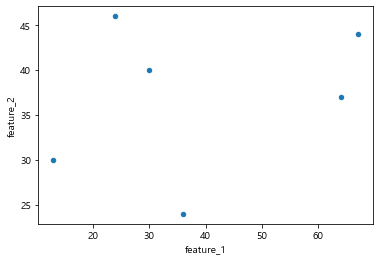

In [165]:
#군집 분석을 이용한 이산화
from sklearn.cluster import KMeans

#데이터 생성
sample = np.array([[13, 30], [30, 40], [67, 44], [36, 24], 
                  [64,37],[24, 46]])
df = pd.DataFrame(sample, columns=['feature_1', 'feature_2'])
print(df)

#필요한 군집의 개수를 가지고 객체를 생성
cluster = KMeans(3, random_state = 42)
#모델을 생성
cluster.fit(sample)
#예측
df['group'] = cluster.predict(sample)
print(df)

df.plot(kind='scatter', x='feature_1', y='feature_2')